In [1]:
import mbuild as mb
from openff.toolkit.topology import Molecule
import random
import numpy
import warnings
warnings.filterwarnings("ignore")

In [2]:
benzene = mb.load("c1ccsc1",smiles=True)
benzene.save("ben.sdf",overwrite=True)

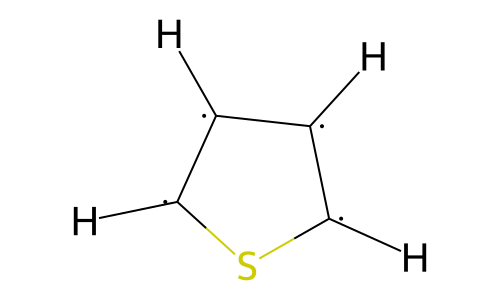

In [3]:
compound = Molecule.from_file("ben.sdf",file_format = "sdf")
compound.visualize()

In [5]:
def walk_molecule(atom, mol, visited, happy):
    octet = {
        6 : 4,
        7 : 3,
        1 : 1,
        8 : 2,
        16 : 2}
    visited[atom.molecule_atom_index]=True
    bonds = [b for b in mol.bonds if atom.molecule_atom_index in [b.atom1_index,b.atom2_index]]
    current_order = numpy.sum([int(b.bond_order) for b in bonds])
    print("im on:",atom.molecule_atom_index)
#    if current_order < octet[atom.atomic_number]:
#        add_order = 1
#        happy[atom.molecule_atom_index] = False
#    if current_order > octet[atom.atomic_number]:
#        add_order = -1
    add_order = 0
    if current_order == octet[atom.atomic_number]:
        happy[atom.molecule_atom_index] = True
    else:
        add_order = 1
        happy[atom.molecule_atom_index] = False
    #print(add_order)
    for b in bonds:
        next_atom = b.atom1
        if b.atom1_index == atom.molecule_atom_index:
            next_atom = b.atom2
        if visited[next_atom.molecule_atom_index] == False:
            #new_order = numpy.sum([int(b.bond_order) for b in bonds])
            walk_molecule(mol.atoms[next_atom.molecule_atom_index],compound,visited,happy)
        if current_order == octet[next_atom.atomic_number]:
            happy[next_atom.molecule_atom_index] = True
        else: 
            happy[next_atom.molecule_atom_index] = False
        if happy[atom.molecule_atom_index] == False and happy[next_atom.molecule_atom_index] == False:
            bonds[0].bond_order += add_order


walk_molecule(compound.atoms[0],compound,[False]*len(compound.atoms),[False]*len(compound.atoms))

im on: 0
im on: 1
im on: 2
im on: 3
im on: 4
im on: 8
1
6
2
im on: 7
1
6
im on: 6
1
12
im on: 5
1
12


In [ ]:
compound.visualize()

In [ ]:
#bond_list = [b for b in compound.bonds if 1 not in [b.atom1.atomic_number, b.atom2.atomic_number]]
#atom_list = [a for a in compound.atoms if 1 not in [a.atomic_number]]
#def add_bonds(atom1_index, atom2_index, mol):
#    change_bonds1 = [b for b in mol.bonds if atom1_index in [b.atom1_index,b.atom2_index]]
#    change_bonds2 = [b for b in change_bonds1 if atom2_index in [b.atom1_index,b.atom2_index]]
#    change_bond = change_bonds2[0]
#    original_order = change_bond.bond_order
#    change_bond.bond_order = original_order + 1
#    print(change_bond.bond_order)
#add_bonds(1,2,compound)
#add_bonds(4,5,compound)
#add_bonds(6,7,compound)
#add_bonds(0,8,compound)